![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [5]:
bikes.groupby('season').total.count()

season
1    2686
2    2733
3    2733
4    2734
Name: total, dtype: int64

**Season clases:**
* 1: Winter
* 2: Spring
* 3: Summer
* 4: Fall

La frecuencia de la renta de bicicletas por estaciones es bastante equitativa, siendo el período más bajo el invierno. En cuanto al promedio de bicicletas rentadas, el mayor número se alcanza en Verano, aunque no existe tanta diferencia con la Primavera. Los períodos más bajos son otoño e invierno.

In [6]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [7]:
bikes['hour'].describe()

count    10886.000000
mean        11.541613
std          6.915838
min          0.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         23.000000
Name: hour, dtype: float64

Las horas en que las personas rentan las bicicletas tiene una distribución bastante uniforme, pues el 50% de los datos se encuentran antes del medio día, con el mínimo en la media noche y el máximo en las 23 horas. En cuanto al promedio existen dos picos en donde en promedio se rentan más bicicletas: sobre las 8 de la mañana y hacia las 5 de la tarde, probablemente ligado a las rutinas laborales de las personas. La madrugada comprede las horas menos frecuentes en promedio.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

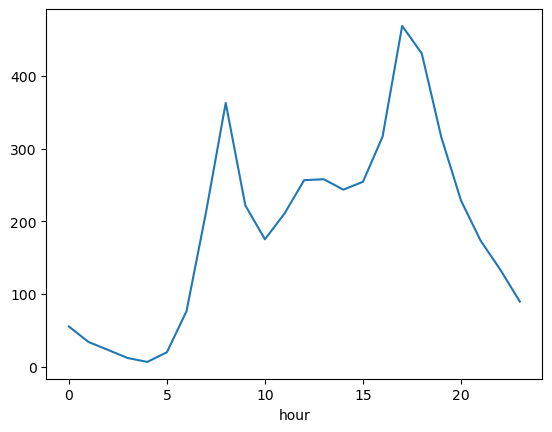

In [8]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

**Total:** El total de bicicletas rentadas tiene su punto más bajo sobre las 4 de la mañana aproximandamente. Se evidencian dos picos sobre las 8 con cerca de 400 bicicletas rentadas al igual que sobre las 5 de la tarde con un número superior.

<Axes: xlabel='hour'>

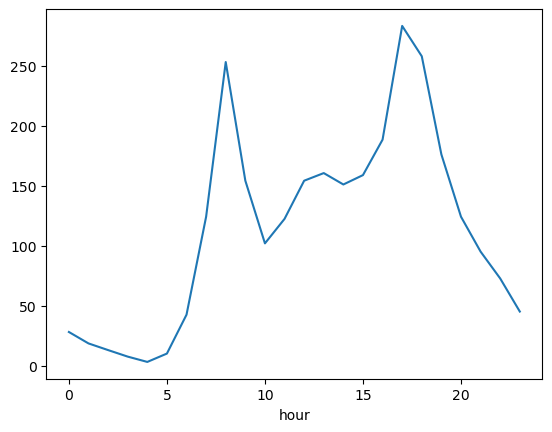

In [9]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes[bikes['season']==1].groupby('hour').total.mean().plot()

**Invierno:** Los patrones de renta no cambian para invierno pues la gráfica tiene una forma bastante similar. La diferencia radica en que el total de bicicletas es mucho más bajo y que en los picos la diferencia del total no es tan marcada.

<Axes: xlabel='hour'>

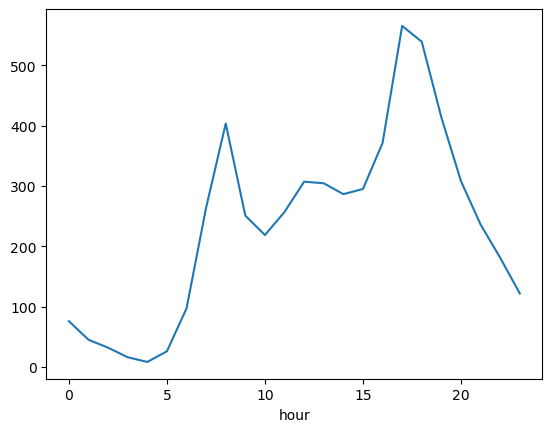

In [10]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes[bikes['season']==3].groupby('hour').total.mean().plot()

**Verano:** Los picos muestran la misma tendencia pero con uma volumetría mayor. Por ejemplo, mientras en invierno para las 23 horas el promedio del total de rentas se encuentra en 50, para verano es de 100 bicicletas.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [11]:
# Celda 3
'''
El primer paso es convertir la variable season en categorías que el modelo pueda identificar
'''
bikes = bikes.reset_index()

bikes = pd.get_dummies(bikes, columns=['season'], prefix='season', dtype=int)

In [12]:
'''
Seleccionamos las variables del modelo y dividimos la muestra entre train y test
'''

y = bikes['total']
X = bikes[['hour', 'season_1', 'season_2', 'season_3']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29032025)

In [13]:
'''
Ajustamos el modelo
'''
rl = LinearRegression()
rl.fit(X_train, y_train)

LinearRegression()

In [14]:
rl.coef_

array([ 10.68764635, -88.79189587,  15.39284103,  33.37050421])

El modelo de regresión lineal nos indica que por cada aumento que exista en la variable hora, los alquileres aumentan en 10.6 unidades mantiendo todo lo demás constante. En cuanto a las estaciones, al eliminar la season_4 se realiza la comparación teniendo Otoño como referencia. En este caso, los coeficientes indican que hay 88 unidades menos para Invierno, 15 más para Primavera y 33 más en Verano. 

In [15]:
'''
Obtenemos el desempeño del modelo a través del MSE
'''
y_pred_rl = rl.predict(X_test)
metrics.mean_squared_error(y_test, y_pred_rl)

24466.596780135453

En promedio el error cuadrático es de 24,466 lo que es bastante alto. Dentro de las **limitaciones** de este modelo se puede anotar que asume relaciones lineales entre los datos y de acuerdo a los análisis previos observamos que al menos para el total de rentas, las horas no siguen una tendencia de este tipo, por el contrario hay picos marcados para ciertas horas, así como una variación estacional. Al utilizar la regresión lineal no estamos observando estos fenómenos de manera completa.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [16]:
# Celda 4
# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
'''
En la regresión no podemos usar el índice de Gini así que lo reemplazamos por el MSE para las particiones.
'''
def mse(y):
    return metrics.mean_squared_error(y, [np.mean(y)] * len(y)) if len(y) > 0 else 0

def mse_bajo(X_col, y, split):
    left = y[X_col < split]   
    right = y[X_col >= split] 

    return mse(y) - (len(left) / len(y)) * mse(left) - (len(right) / len(y)) * mse(right)


def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = mse_bajo(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

In [17]:
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = y.mean() 
    
    tree = dict(y_pred=y_pred, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None and level >= max_depth:
        return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [18]:
def tree_predict(X, tree):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        predicted = predicted * tree['y_pred']
        
    else:
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacío, solo usa el derecho
            predicted[~filter_l] = tree_predict(X_r, tree['sr'])
        elif X_r.shape[0] == 0:  # Si el nodo derecho está vacío, solo usa el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'])
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'])
            predicted[~filter_l] = tree_predict(X_r, tree['sr'])

    return predicted


In [19]:
# Aplicación de la función tree_grow
tree_grow(X_train, y_train, level=0, min_gain=0.001, max_depth=3, num_pct=100)

{'y_pred': 191.96955380577427,
 'level': 0,
 'split': [0, 7.0],
 'n_samples': 7620,
 'gain': 10353.12242118331,
 'sl': {'y_pred': 32.46642468239565,
  'level': 1,
  'split': [0, 6.0],
  'n_samples': 2204,
  'gain': 327.529169676058,
  'sl': {'y_pred': 24.99415825809878,
   'level': 2,
   'split': [0, 2.0],
   'n_samples': 1883,
   'gain': 186.61169948877793,
   'sl': {'y_pred': 44.32854864433812,
    'level': 3,
    'split': -1,
    'n_samples': 627,
    'gain': 126.19312396710959},
   'sr': {'y_pred': 15.34235668789809,
    'level': 3,
    'split': -1,
    'n_samples': 1256,
    'gain': 22.42326805707367}},
  'sr': {'y_pred': 76.29906542056075,
   'level': 2,
   'split': [1, 1.0],
   'n_samples': 321,
   'gain': 323.68887712283254,
   'sl': {'y_pred': 86.57851239669421,
    'level': 3,
    'split': -1,
    'n_samples': 242,
    'gain': 17.568933295605575},
   'sr': {'y_pred': 44.81012658227848,
    'level': 3,
    'split': -1,
    'n_samples': 79,
    'gain': 0}}},
 'sr': {'y_pred': 2

In [20]:
tree = tree_grow(X_train, y_train, level=0, min_gain=0.001, max_depth=3, num_pct=10)
y_pred = tree_predict(X_test, tree)

In [21]:
metrics.mean_squared_error(y_test, y_pred)

16684.650278517314

Al ser un problema de regresión para realizar las particiones escogemos los valores que minicen el MSE, posteriormente le damos al modelo el parámetro de profundidas igual a 3 que terminan en 15 nodos. Al evaluar el desempeño en la muestra de test encontramos un MSE de 16684, que sigue siendo alto pero menor que el obtenido en el modelo de regresión lineal. 

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [22]:
# Celda 5
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 23)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
rmse_scores = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    
    dtree_reg = DecisionTreeRegressor(max_depth=depth, random_state=29032025)
    rmse_scores.append(np.sqrt(-(cross_val_score(dtree_reg, X_train, y_train, cv=10, scoring='neg_mean_squared_error')).mean())) 

Text(0, 0.5, 'rmse')

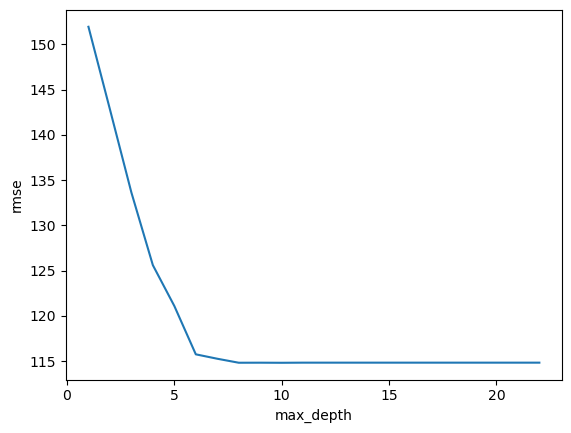

In [23]:
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, rmse_scores)
plt.xlabel('max_depth')
plt.ylabel('rmse')

In [24]:
# Mejor desempeño del modelo y su correspondiente max_depth
sorted(zip(rmse_scores, max_depth_range))[0]

(114.82061828248436, 10)

In [25]:
tree_rg = DecisionTreeRegressor(max_depth=10, random_state=29032025)
tree_rg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=29032025)

In [26]:
y_pred_dr = tree_rg.predict(X_test)
metrics.mean_squared_error(y_test, y_pred_dr)

12650.971540545592

Se ejecuta el modelo de árboles para regresión y mediante validación cruzada encontramos que el parámetro que miniza el error es profundidad igual a 10. De esta manera, obtenemos un MSE de 12.650 que es mucho mejor que el de la regresión lineal que prácticamente se duplicaba.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [27]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [28]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [29]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [30]:
# Celda 6
'''
REGRESIÓN LOGÍSTICA
'''

lr =  LogisticRegression(random_state=29032025)
lr.fit(X_train, y_train)

LogisticRegression(random_state=29032025)

In [31]:
y_pred_lr = lr.predict(X_test)

In [32]:
print('\n' + 'Accuracy Regresión Logística: '+ str(metrics.accuracy_score(y_test, y_pred_lr))+'\n')
print('F1-Score Regresión Logística: '+ str(metrics.f1_score(y_test, y_pred_lr))+ '\n')


Accuracy Regresión Logística: 0.6126666666666667

F1-Score Regresión Logística: 0.6082265677680377



Text(0, 0.5, 'Accuracy')

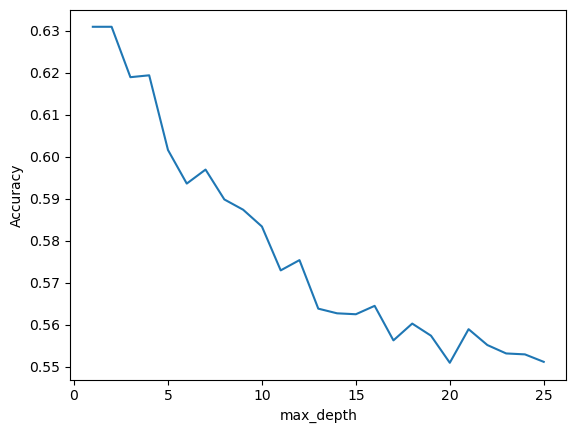

In [33]:
'''
ÁRBOL DE DECISIÓN
'''
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 26)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())
    
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [34]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.6308888888888888, 2)

In [35]:
clf = DecisionTreeClassifier(max_depth=2, random_state=29032025)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=29032025)

In [36]:
y_pred_clf = clf.predict(X_test)

In [37]:
print('\n' + 'Accuracy Árbol: '+ str(metrics.accuracy_score(y_test, y_pred_clf))+'\n')
print('F1-Score Árbol: '+ str(metrics.f1_score(y_test, y_pred_clf))+ '\n')


Accuracy Árbol: 0.6453333333333333

F1-Score Árbol: 0.6448598130841121



El desempeño del árbol de decisión es superior en ambas métricas utilizadas. En el caso del Accuracy indica que el modelo está acertando en el 65% de las observaciones predichas en general, mientras que el F1 Score demuestra que existe un buen equilibrio entre *Precision* y *Recall*.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [38]:
# Celda 7
# Parámetros
n_estimators = 100
np.random.seed(123)

n_samples = X_train.shape[0]

samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(3 * n_estimators)]

In [39]:
np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=3 * n_estimators)

modelos = {}

'1. Max_depth'
for i in range(n_estimators):
    modelos[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=6, random_state=seeds[i])
    modelos[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    
'2. min_samples_leaf'
for i in range(n_estimators, 2 * n_estimators):
    modelos[i] = DecisionTreeClassifier(max_features="sqrt", min_samples_leaf=8, random_state=seeds[i])
    modelos[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

'3.Regresión logística'
for i in range(2 * n_estimators, 3 * n_estimators):
    modelos[i] = LogisticRegression(random_state=seeds[i])
    modelos[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

In [40]:
# Predicción para los datos del test con cada modelo
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(3 * n_estimators)))

for i in range(3 * n_estimators):
    y_pred_df.iloc[:, i] = modelos[i].predict(X_test)
    

y_pred_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
1483,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2185,1,1,1,1,1,0,0,1,1,1,...,0,1,1,0,1,1,0,0,0,0
2520,1,1,1,1,1,1,1,1,0,0,...,1,1,1,1,1,1,1,1,1,1
3721,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Impresión de la cantidad de modelos que predijeron 1 para 10 observaciones
print(y_pred_df.sum(axis=1)[:10])

1483    241
2185    195
2520    240
3721    273
3727     44
4524    231
234      15
4735     48
5839    120
2939    232
dtype: object


In [42]:
# Votación mayoritaria
y_pred_ensam = (y_pred_df.sum(axis=1) >= (3*n_estimators /2)).astype(np.int64)

# Evaluación del Ensamble
print("F1-Score Ensamble:", metrics.f1_score(y_pred_ensam, y_test))
print("Accuracy Ensamble:", metrics.accuracy_score(y_pred_ensam, y_test))

F1-Score Ensamble: 0.6191780821917808
Accuracy Ensamble: 0.6293333333333333


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [43]:
# Celda 8
samples_oob = []
# Obtención de las observaciones fuera de la bolsa "out-of-bag" para cada muestra
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

In [44]:
errors = np.zeros(3 * n_estimators)

for i in range(3 * n_estimators):
    y_pred_ = modelos[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)

In [45]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
alpha = (1 - errors) / (1 - errors).sum()

In [46]:
weighted_sum_1 = ((y_pred_df) * alpha).sum(axis=1)
weighted_sum_1.head(20)

1483    0.810695
2185    0.651278
2520    0.805485
3721    0.912653
3727    0.142275
4524    0.775461
234     0.048671
4735    0.156619
5839    0.399624
2939     0.77746
3053     0.79291
867      0.79114
276     0.879706
5798    0.099086
3512    0.903132
5789    0.089892
3198    0.830891
5908    0.868867
5718    0.167692
2687    0.090509
dtype: object

In [47]:
y_pred_weighted = (weighted_sum_1 >= 0.5).astype(np.int64)
metrics.f1_score(y_pred_weighted, y_test), metrics.accuracy_score(y_pred_weighted, y_test)

(0.6171821305841925, 0.6286666666666667)

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

El desempeño de los modelos es ligeramente superior cuando evaluamos la votación mayoritaria obteniendo un *F1 Score* de 61.9% y un *Accuracy* de 62.9%, ofreciendo una ventaja al ser una versión más simplificada que obtiene un buen desempeño. A pesar de que se podría pensar que viene a mal por dar el mismo peso a todos los estimadores, se demostró que, para este caso, la votación ponderada no termina de potenciar los mejores estimadores, agregando complejidad en el código y a los análisis sin obtener un beneficio significativo. 